# ESG Project

***Corporate ESG Score Analysis Using Python & Power BI***

This project analyzes Environmental, Social, and Governance (ESG) performance of 722 publicly-listed mid- and large-cap companies, using a real-world dataset containing ESG scores, ratings, and sector classifications.
The goal is to explore how companies perform across ESG dimensions and identify sector-wise patterns that can support sustainability-related decision-making.

In [1]:
##Importing All Necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Description
This dataset provides Environmental, Social, and Governance (ESG) scores and ratings for over 700 mid to large-cap publicly traded companies across a variety of industries. Each row in the dataset represents a single company, offering insights into its ESG performance. The data is intended to foster greater transparency in corporate ESG practices, enable the integration of ESG considerations into investment strategies, and encourage companies to improve their sustainability, thereby supporting major societal objectives such as combating climate change and promoting social equity.

# Columns
- ticker: The unique stock ticker symbol for each company.
- name: The full corporate name of the company.
- currency: The currency in which the company's stock is traded, predominantly USD and CNY.
- exchange: The stock exchange where the company is listed, such as the New York Stock Exchange or NASDAQ.
- industry: The industry sector to which the company belongs, with examples including Technology and Biotechnology.
- logo: A URL linking to the company's official logo.
- weburl: The official website address for the company.
- environment_grade: The letter grade (e.g., A, B) indicating the company's environmental performance.
- environment_level: A categorical level (e.g., High, Medium, Low) for environmental performance.
- social_grade: The letter grade (e.g., BB, B) reflecting the company's social performance.
- social_level: A categorical level (e.g., Medium, High) for social performance.
- governance_grade: The letter grade (e.g., BB, B) for the company's governance performance.
- governance_level: A categorical level (e.g., Medium, High) for governance performance.
- environment_score: A numeric score, ranging from 0-1000, for environmental performance.
- social_score: A numeric score, ranging from 0-1000, for social performance.
- governance_score: A numeric score, ranging from 0-1000, for governance performance.
- total_score: An overall numeric ESG score, ranging from 0-3000.
- last_processing_date: The date when the ESG data for the company was last processed.
- total_grade: The overall letter grade (e.g., BBB, B) for ESG performance.
- total_level: The overall categorical level (e.g., High, Medium) for ESG performance.
- cik: The company's unique SEC (Securities and Exchange Commission) identifier.


In [2]:
# Load the ESG dataset (replace the path if needed)
df = pd.read_excel('data.ESG.xlsx')

In [3]:
# Print DataFrame structure and column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ticker                722 non-null    object        
 1   name                  722 non-null    object        
 2   currency              722 non-null    object        
 3   exchange              722 non-null    object        
 4   industry              709 non-null    object        
 5   logo                  702 non-null    object        
 6   weburl                706 non-null    object        
 7   environment_grade     722 non-null    object        
 8   environment_level     722 non-null    object        
 9   social_grade          722 non-null    object        
 10  social_level          722 non-null    object        
 11  governance_grade      722 non-null    object        
 12  governance_level      722 non-null    object        
 13  environment_score   

In [4]:
# Preview first few rows
df.head()

,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
0,dis,Walt Disney Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/ef50b4a2b263c84...,https://thewaltdisneycompany.com/,A,High,BB,...,BB,Medium,510,316,321,1147,2022-04-19,BBB,High,1744489
1,gm,General Motors Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Automobiles,https://static.finnhub.io/logo/9253db78-80c9-1...,https://www.gm.com/,A,High,BB,...,B,Medium,510,303,255,1068,2022-04-17,BBB,High,1467858
2,gww,WW Grainger Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Trading Companies and Distributors,https://static.finnhub.io/logo/f153dcda-80eb-1...,https://www.grainger.com/,B,Medium,BB,...,B,Medium,255,385,240,880,2022-04-19,BB,Medium,277135
3,mhk,Mohawk Industries Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Consumer products,https://static.finnhub.io/logo/26868a62-80ec-1...,https://mohawkind.com/,A,High,B,...,BB,Medium,570,298,303,1171,2022-04-18,BBB,High,851968
4,lyv,Live Nation Entertainment Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/1cd144d2-80ec-1...,https://www.livenationentertainment.com/,BBB,High,BB,...,B,Medium,492,310,250,1052,2022-04-18,BBB,High,1335258


In [5]:
# Get the number of rows and columns in the DataFrame
df.shape

(722, 21)

In [6]:
# Count the number of missing (NaN) values in each column
df.isnull().sum()

ticker                   0
name                     0
currency                 0
exchange                 0
industry                13
logo                    20
weburl                  16
environment_grade        0
environment_level        0
social_grade             0
social_level             0
governance_grade         0
governance_level         0
environment_score        0
social_score             0
governance_score         0
total_score              0
last_processing_date     0
total_grade              0
total_level              0
cik                      0
dtype: int64

In [7]:
# Columns not needed for ESG analysis
cols_to_drop = ['logo', 'weburl', 'cik', 'currency', 'exchange']

df = df.drop(columns=cols_to_drop)

# Also fill missing industry values
df['industry'] = df['industry'].fillna("Unknown")

df.head()


,ticker,name,industry,environment_grade,environment_level,social_grade,social_level,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level
0,dis,Walt Disney Co,Media,A,High,BB,Medium,BB,Medium,510,316,321,1147,2022-04-19,BBB,High
1,gm,General Motors Co,Automobiles,A,High,BB,Medium,B,Medium,510,303,255,1068,2022-04-17,BBB,High
2,gww,WW Grainger Inc,Trading Companies and Distributors,B,Medium,BB,Medium,B,Medium,255,385,240,880,2022-04-19,BB,Medium
3,mhk,Mohawk Industries Inc,Consumer products,A,High,B,Medium,BB,Medium,570,298,303,1171,2022-04-18,BBB,High
4,lyv,Live Nation Entertainment Inc,Media,BBB,High,BB,Medium,B,Medium,492,310,250,1052,2022-04-18,BBB,High


# Exploratory Data Analysis(EDA)

In [8]:
# Generate summary statistics for the selected ESG score columns
df[['environment_score','social_score','governance_score','total_score']].describe()

,environment_score,social_score,governance_score,total_score
count,722.000000,722.000000,722.000000,722.000000
mean,404.806094,292.182825,278.761773,975.750693
std,145.103870,57.017406,47.031536,218.751796
min,200.000000,160.000000,75.000000,600.000000
25%,240.000000,243.000000,235.000000,763.000000
50%,483.000000,302.000000,300.000000,1046.000000
75%,518.750000,322.750000,310.000000,1144.000000
max,719.000000,667.000000,475.000000,1536.000000


Text(0.5, 1.0, 'Total ESG Score Distribution')

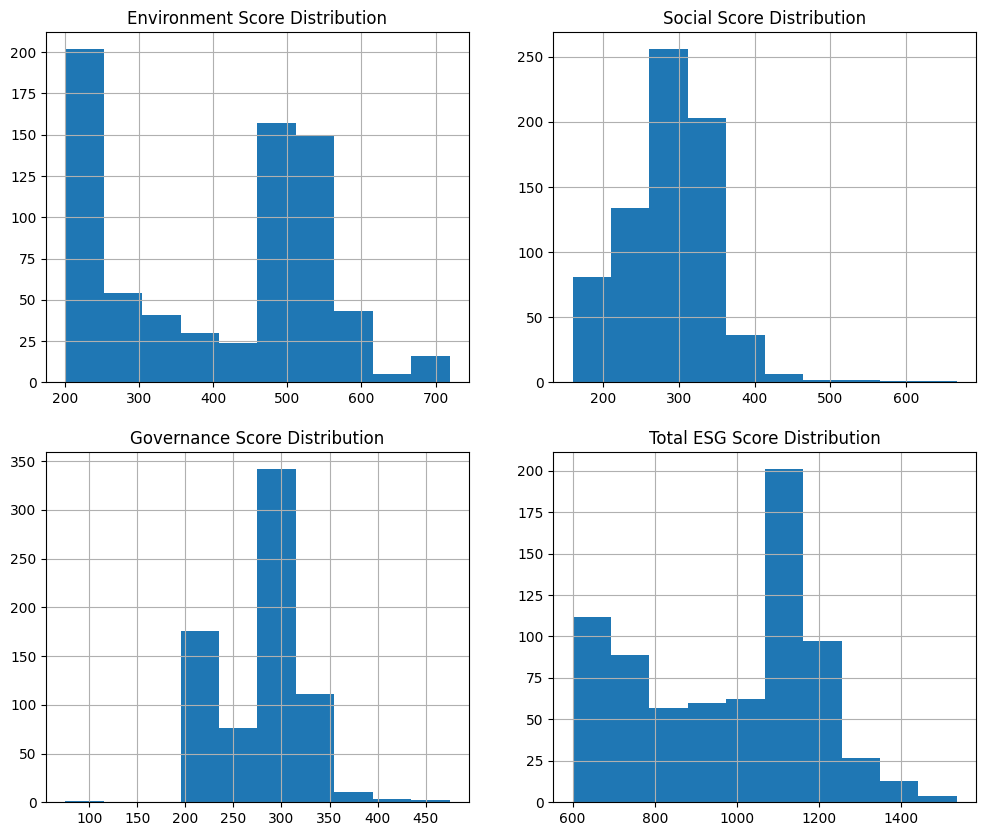

In [9]:
# ESG Score Distributions

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

df['environment_score'].hist(ax=ax[0][0])
ax[0][0].set_title("Environment Score Distribution")

df['social_score'].hist(ax=ax[0][1])
ax[0][1].set_title("Social Score Distribution")

df['governance_score'].hist(ax=ax[1][0])
ax[1][0].set_title("Governance Score Distribution")

df['total_score'].hist(ax=ax[1][1])
ax[1][1].set_title("Total ESG Score Distribution")


# Interpretation of ESG Score Distributions
***Environment Score Distribution***

The distribution shows two major clusters:

- A large group of companies scoring around 200–300, indicating weaker environmental performance.

- Another cluster around 450–550, showing companies with fair to strong environmental initiatives.

- The scores are spread out, suggesting that environmental performance varies greatly across industries.

- A small number of companies score above 600, indicating top-tier environmental practices (rare).

***Social Score Distribution***

- Most companies fall in the 250–350 range, forming a tight, consistent cluster.

- Fewer companies deviate from this group compared to environmental scores.

- Very few outliers exist above 400.

- Social performance is more consistent across companies. Most firms maintain a moderate level of social responsibility, with fewer extremes.

***Governance Score Distribution***

- Governance scores are highly concentrated, mainly between 200–300.

- This is the tightest distribution of all ESG pillars.

- Very few companies score below 150 or above 350.
- Governance practices appear to be standardized across companies. This suggests that regulatory requirements or corporate governance frameworks keep governance performance within a narrow, similar range.


***Total ESG Score Distribution***
- One cluster around 800–900.
- Another around 1100–1200.
- Very few companies reach above 1300.
- Overall ESG performance forms two performance groups:
A mid-performing group (800–900)
A strong-performing group (1100–1200)

This indicates that companies with strong E, S, or G scores tend to perform well consistently across all three pillars.


Text(0.5, 0, 'Average ESG Score')

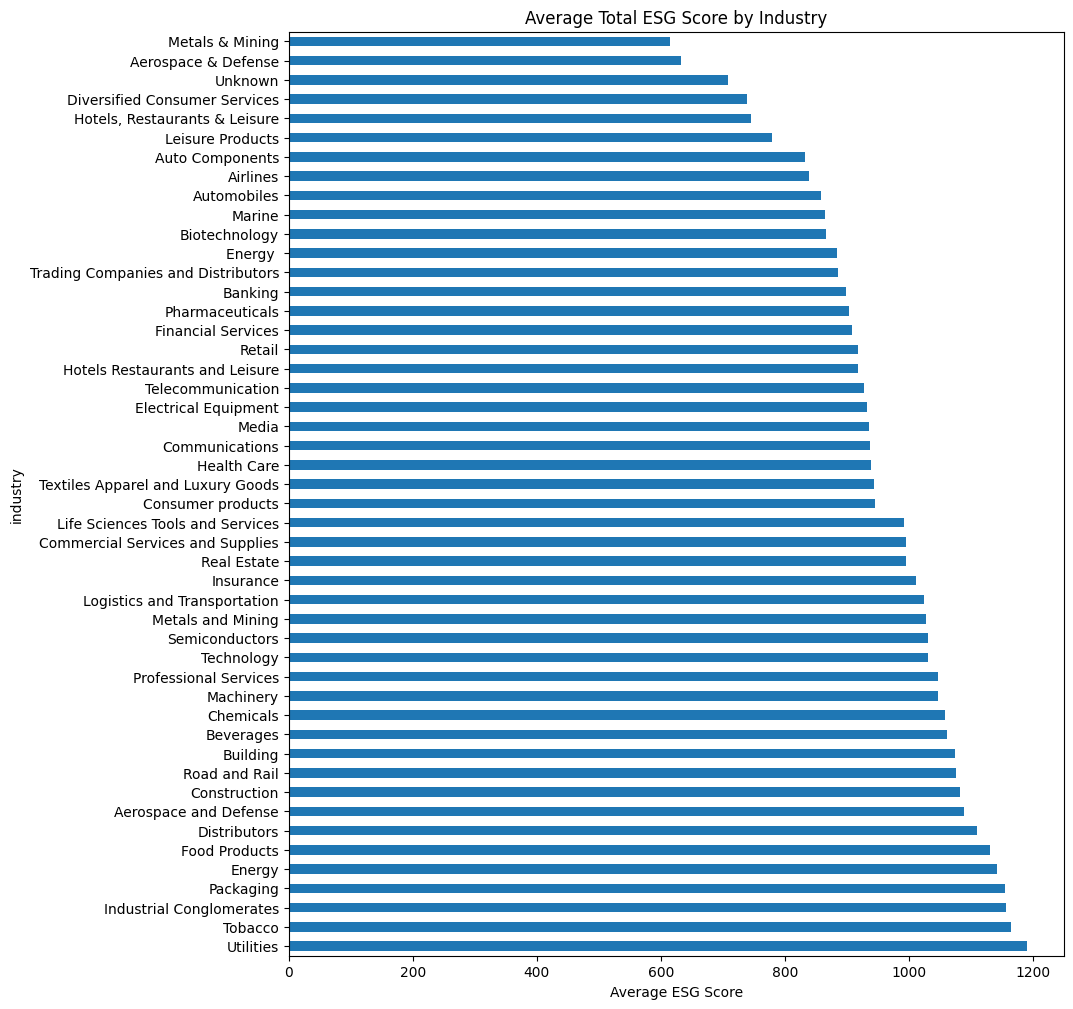

In [10]:
industry_scores = df.groupby('industry')['total_score'].mean().sort_values(ascending=False)
industry_scores.plot(kind='barh', figsize=(10, 12))
plt.title("Average Total ESG Score by Industry")
plt.xlabel("Average ESG Score")



# Industry wise Average ESG Score
The ranking shows large variation in average ESG scores across industries. Some sectors consistently report stronger ESG performance (e.g., Utilities, Tobacco, Industrial Conglomerates), while others lag behind (e.g., Metals & Mining, Aerospace & Defense). This highlights how regulatory pressure, reporting maturity, and business models influence ESG performance.

***Interpretation:***
These industries tend to have:

- More mature ESG disclosure frameworks
- Higher regulatory oversight (e.g., utilities must report environmental indicators)
- Better corporate governance structures
- Stronger stakeholder pressure, particularly from consumers & regulators

***Examining The TOP 10 and Bottom 10 Industry based on their ESG score Performance***

<Figure size 1400x800 with 0 Axes>

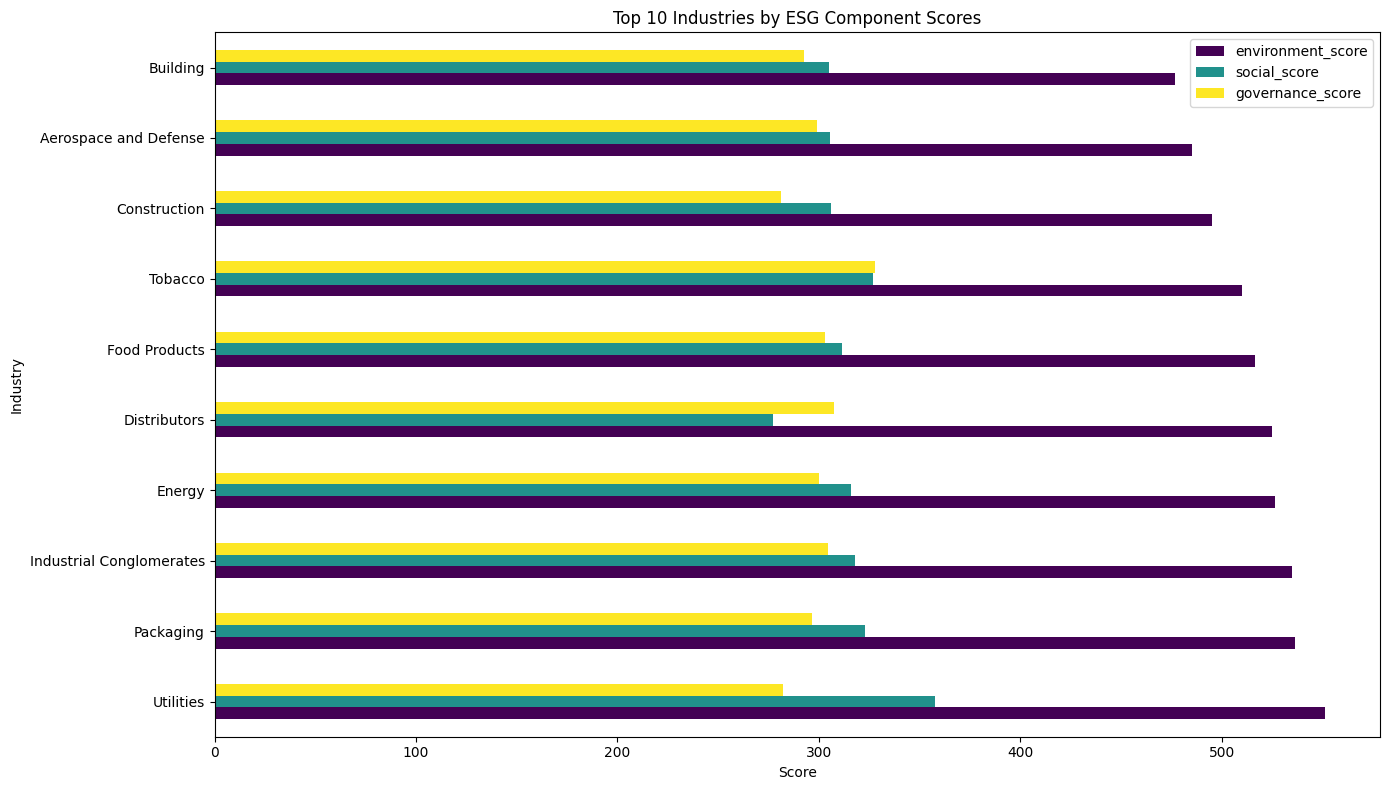

<Figure size 1400x800 with 0 Axes>

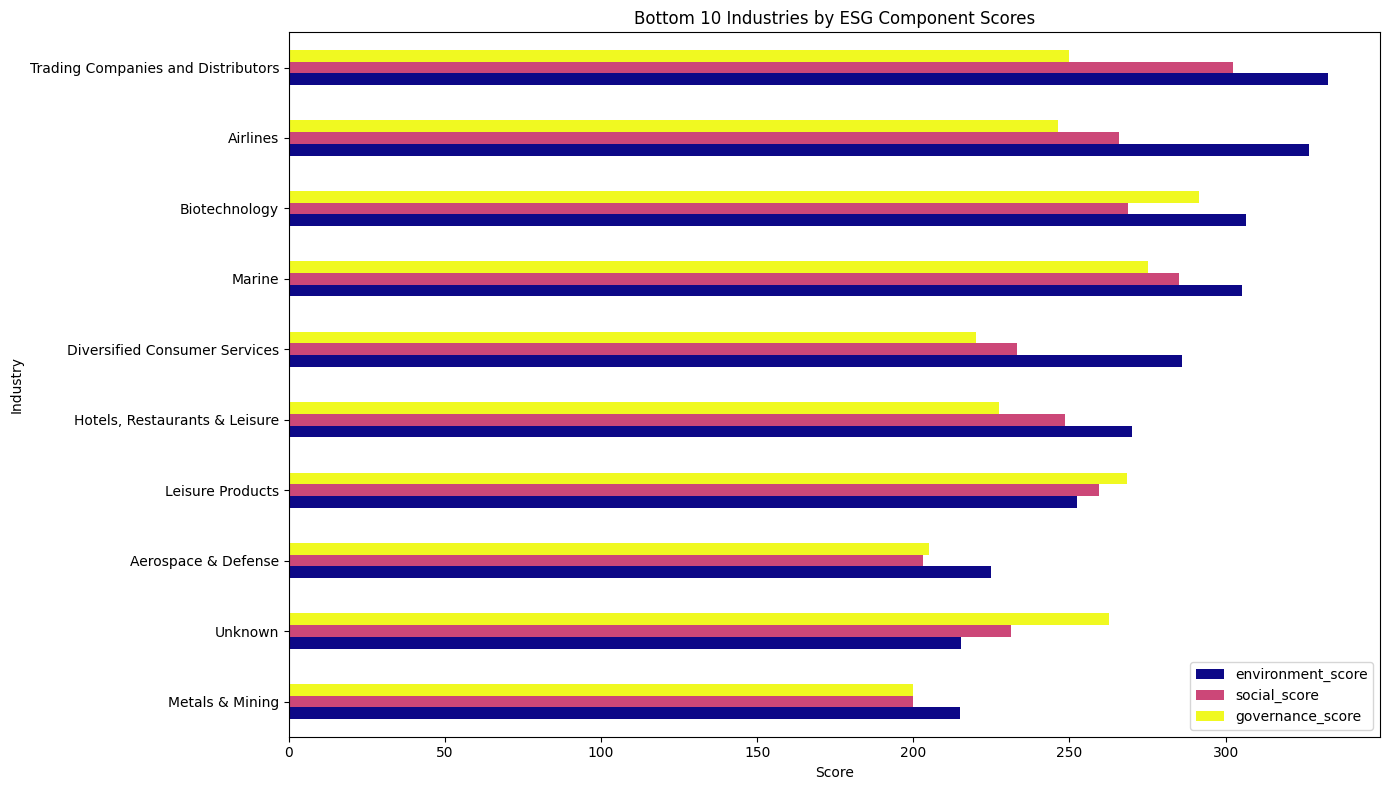

In [11]:
import matplotlib.pyplot as plt

# Compute mean ESG component scores by industry
industry_scores = df.groupby('industry')[['environment_score','social_score','governance_score']].mean()

# Drop industries with missing industries
industry_scores = industry_scores.dropna()

# ---------- TOP 10 ----------
top10 = industry_scores.sort_values('environment_score' , ascending=False).head(10)

plt.figure(figsize=(14,8))
top10.plot(kind='barh', 
           cmap='viridis',   # gradient color map
           figsize=(14,8))

plt.title("Top 10 Industries by ESG Component Scores")
plt.xlabel("Score")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

# ---------- BOTTOM 10 ----------
bottom10 = industry_scores.sort_values('environment_score' , ascending=True).head(10)

plt.figure(figsize=(14,8))
bottom10.plot(kind='barh', 
              cmap='plasma',  # different gradient for contrast
              figsize=(14,8))

plt.title("Bottom 10 Industries by ESG Component Scores")
plt.xlabel("Score")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()


- Top industries demonstrate balanced ESG maturity, with particularly strong performance in environmental and social dimensions. These industries are likely more advanced in sustainability reporting, stakeholder management, and long-term ESG strategy.
- Bottom-performing industries reflect lower ESG maturity, especially in environmental sustainability. These sectors may require stronger regulations, improved reporting frameworks, and more consistent governance enforcement to improve scores.

***Top 10 ESG performing companies***



In [12]:
df.nlargest(10, 'total_score')[['name','industry','total_score']]


,name,industry,total_score
452,Conocophillips,Energy,1536
176,Microsoft Corp,Technology,1533
302,Edison International,Utilities,1528
18,Airbnb Inc,Hotels Restaurants and Leisure,1475
250,Air Products and Chemicals Inc,Chemicals,1442
137,Amazon.com Inc,Retail,1433
487,Newmont Corporation,Metals and Mining,1419
195,PepsiCo Inc,Beverages,1417
494,Exelon Corp,Utilities,1413
372,Pioneer Natural Resources Co,Energy,1412


This code extracts the top 10 companies with the highest ESG performance based on total_score. These companies represent the strongest overall sustainability leaders across all three ESG dimensions. The results show a mix of industries—such as Energy, Technology, Utilities, and Retail—indicating that high ESG performance is not limited to a single sector but can be achieved by firms across diverse operational environments.

***Correlation Matrix***

In [13]:
df[['environment_score','social_score','governance_score','total_score']].corr()

,environment_score,social_score,governance_score,total_score
environment_score,1.000000,0.671817,0.558682,0.958551
social_score,0.671817,1.000000,0.483364,0.810206
governance_score,0.558682,0.483364,1.000000,0.711576
total_score,0.958551,0.810206,0.711576,1.000000


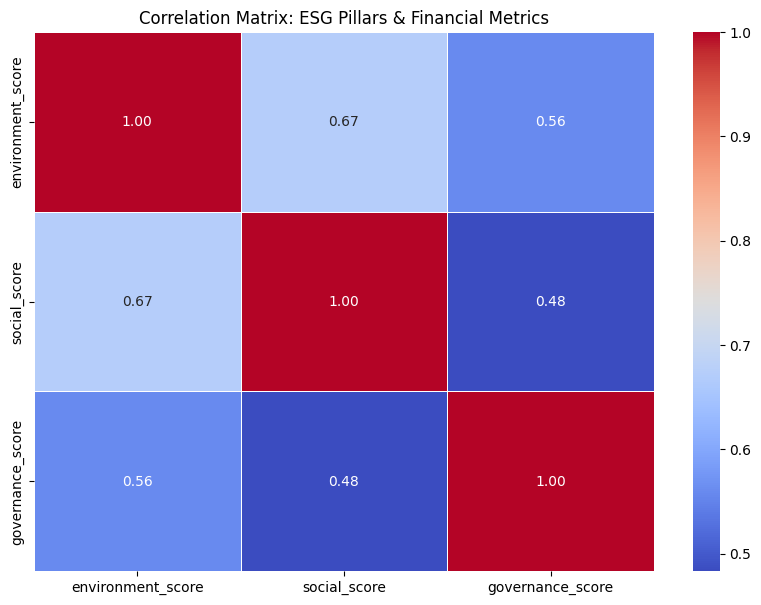

In [14]:
# select numeric columns for correlation
num_cols = [
    'environment_score',
    'social_score',
    'governance_score',
    'esg_combined_score',
    'market_cap',        # optional
    'revenue',           # optional
    'profitability'      # optional
]

# filter only those that exist
num_cols = [c for c in num_cols if c in df.columns]

corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Matrix: ESG Pillars & Financial Metrics")
plt.show()

# Relationship Between ESG Components

***Environment vs Social (0.67 — Moderately Strong Positive Correlation)***

This means companies with higher environmental performance also tend to have higher social performance. Firms that invest in pollution control, renewable energy, or resource efficiency also frequently invest in labor welfare, community engagement, and social policies. This is a common pattern in ESG-driven organizations.

***Environment vs Governance (0.56 — Moderate Positive Correlation)***

Environmental performance is moderately aligned with governance quality. Companies with strong governance structures—transparent reporting, board oversight, and compliance—tend to implement better environmental management systems.

***Social vs Governance (0.48 — Weak-to-Moderate Positive Correlation)***

This is the weakest correlation among the components. Social initiatives (labor practices, community welfare) do not always move in parallel with governance quality. A firm can have good governance but average social practices, or vice versa.This variation is common because social policies vary heavily by industry (e.g., healthcare vs manufacturing).

# Relationship of Each Component With Total ESG Score

***Environment vs Total Score (0.96 — Very Strong Correlation)***

This is the single strongest relationship in the entire matrix. Environmental score is the biggest driver of the overall ESG score.

***Social vs Total Score (0.81 — Strong Correlation)***

Social score also contributes strongly to total ESG performance. Companies with good social practices (labor policies, community relations) tend to have higher overall ESG performance, but S is still less influential than Environment component.

***Governance vs Total Score (0.71 — Moderate-Strong Correlation)***

Governance contributes meaningfully but is the least influential among the three. Good governance is important, but governance scores vary less across industries, leading to a smaller impact on the total score compared to the Environment and Social components.


# Scatter Plot Analysis of ESG Relationships

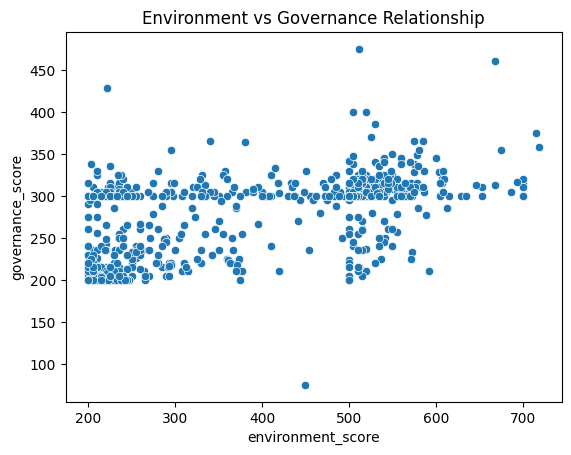

In [15]:
sns.scatterplot(data=df, x='environment_score', y='governance_score')
plt.title("Environment vs Governance Relationship")
plt.show()


***Interpretation of the Scatter Plot: Environment vs Governance Score***
The scatter plot shows the relationship between companies' environmental scores and governance scores.

1. Weak to Moderate Positive Relationship

The points show a slight upward spread, which matches the correlation value from your matrix (≈ 0.56).
This means:

- Companies with stronger environmental performance tend to have better governance.

- However, the relationship is not very strong, and there is significant variation.

2. High Spread in Governance Scores

- Across all levels of environmental performance, governance scores remain mostly within the 200–350 range.

3. Visible Clusters Suggest Reporting Standards

The plot shows clusters of points around certain governance values (≈ 250, 300). ESG rating providers may assign governance scores in bands or tiers. Many companies fall into similar governance categories due to standardized metrics such as:
- board structure,
- executive compensation,
- audit committee quality,
- shareholder rights, etc.

4. Outliers Exist (But Do Not Change the Trend)

A few companies have unusually high governance scores (400–450) or unusually low governance scores (<150).
Similarly, some have high environmental scores (>700) or low ones (<250).
These exceptions likely represent:

- Highly regulated companies with strong governance

- Companies facing governance controversies

- Industries with strict environmental reporting

- Outliers are normal in ESG datasets.

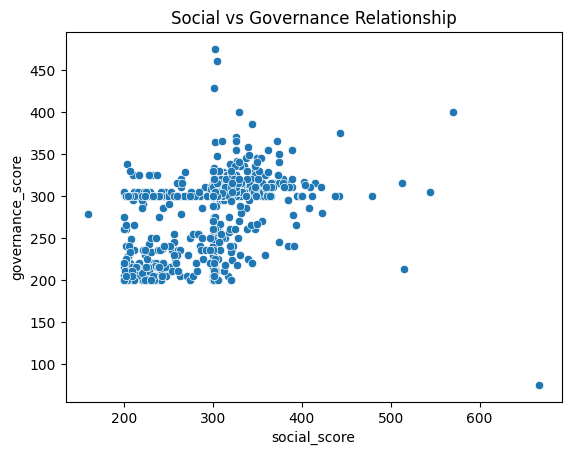

In [16]:
sns.scatterplot(data=df, x='social_score', y='governance_score')
plt.title("Social vs Governance Relationship")
plt.show()


***The scatter plot displays the relationship between social_score (x-axis) and governance_score (y-axis)***

Interpretation:

The points form a very loose, wide cloud, indicating weak association between the two variables. This aligns with the correlation coefficient you found earlier (0.48), which suggests moderate but not strong correlation. Many firms have social scores clustered between 250–400, but their governance scores vary widely from 200 to 350+, meaning:

- Companies can perform well socially while having weak governance practices.

- Governance performance shows higher dispersion, suggesting less uniformity across firms.

- A few outliers (very high social or very low governance scores) indicate that ESG performance is not uniformly balanced.


- Social and governance performance do not move together consistently. Improvements in one dimension do not guarantee improvements in the other.

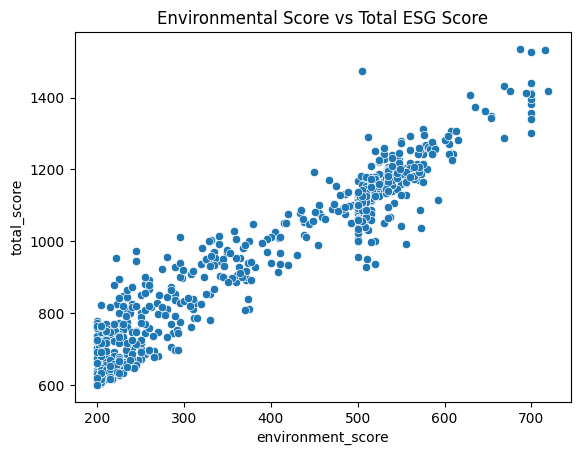

In [17]:
sns.scatterplot(data=df, x='environment_score', y='total_score')
plt.title("Environmental Score vs Total ESG Score")
plt.show()


***Environmental Score vs Total ESG Score — Interpretation***

The scatter plot compares environment_score (x-axis) and total_score (y-axis).


A strong positive linear relationship is clearly visible. As environmental scores increase, the total ESG score increases almost proportionally. This visually confirms the very high correlation you saw earlier (0.96). The points follow a clear upward trend with relatively tight clustering, indicating:

- Environment score is a major contributor to total ESG performance.

- Companies with poor environmental performance rarely achieve high total ESG scores.


- Environmental performance is the dominant driver of total ESG score in your dataset. The total score is heavily dependent on environmental scoring.

# Count of Companies by Total ESG Grade

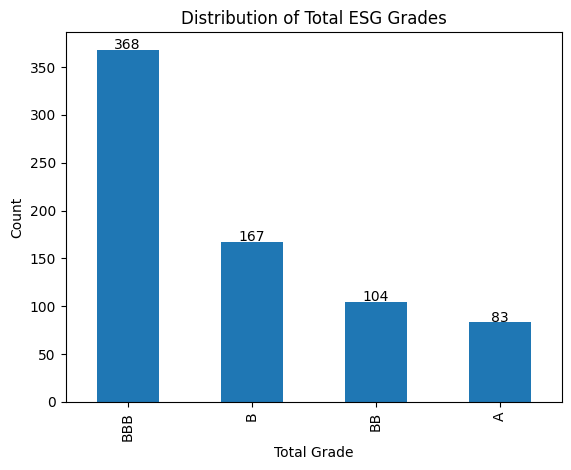

In [20]:
ax = df['total_grade'].value_counts().plot(kind='bar')

for i, v in enumerate(df['total_grade'].value_counts()):
    ax.text(i, v + 1, str(v), ha='center')

plt.xlabel("Total Grade")
plt.ylabel("Count")
plt.title("Distribution of Total ESG Grades")
plt.show()


The distribution of Total ESG Grades shows that most companies in the dataset fall into mid-tier ESG performance categories. The largest group is BBB, with 368 companies, indicating that a substantial portion of firms exhibit average and moderately strong ESG practices but still have room for improvement. The next significant cluster is B grade, consisting of 167 companies, suggesting that many firms maintain only basic or below-average ESG standards.

Additionally, 104 companies are rated BB, which represents a slightly weaker ESG position compared to BBB but still not at the lowest end. Finally, only 83 companies achieve an A grade, showing that high-quality ESG performance is relatively uncommon within the dataset.

Overall, this distribution suggests a concentration around mid-level ESG performance, with relatively few companies excelling (A) and a meaningful share requiring improvement (B and BB categories). The grade distribution indicates that ESG maturity is uneven, with most firms operating in the middle of the spectrum rather than at the extremes.